<span style=color:red;font-size:60px>ASSIGNMENT</span>

<span style=color:green;font-size:55px>Support Vector Machines-2</span>

# Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?

# Ans

# Relationship Between Polynomial Functions and Kernel Functions in Machine Learning Algorithms

## Introduction
In machine learning, kernel functions are used to transform data into a higher-dimensional space to make it easier to classify using algorithms like Support Vector Machines (SVMs). Polynomial functions are a type of kernel function that allows the creation of non-linear decision boundaries.

## Polynomial Kernel Function

The polynomial kernel function is defined as:
\[ K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d \]
where:
- \(\mathbf{x}_i\) and \(\mathbf{x}_j\) are input vectors,
- \(c\) is a constant (also known as the coefficient),
- \(d\) is the degree of the polynomial.

## Relationship and Usage

1. **Non-linear Transformation**:
    - Polynomial kernel functions enable SVMs and other kernel-based algorithms to create non-linear decision boundaries by implicitly mapping the input features into a higher-dimensional space.
    - This mapping allows the algorithm to capture complex relationships between the input features that a linear model would not be able to capture.

2. **Computational Efficiency**:
    - Directly computing the coordinates of the data points in the higher-dimensional space can be computationally expensive. The polynomial kernel function allows the computation of the dot product in the higher-dimensional space without explicitly transforming the data, making the process more efficient.

3. **Flexibility**:
    - By adjusting the degree \(d\) and the constant \(c\), polynomial kernels provide flexibility in controlling the complexity of the decision boundary. Higher degrees result in more complex boundaries that can capture intricate patterns in the data.

## Example

Consider a 2-dimensional dataset where the decision boundary is non-linear. Using a polynomial kernel with degree \(d = 2\) can transform the data into a space where a linear decision boundary can be used to separate the classes.

### Visualization

Here's a simple illustration:



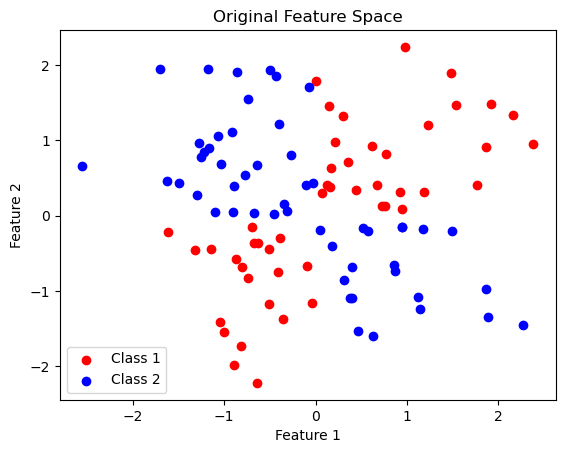

In [2]:
#### Original Space

import matplotlib.pyplot as plt
import numpy as np

# Generate example data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 1')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Original Feature Space')
plt.show()


# Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

# Ans-

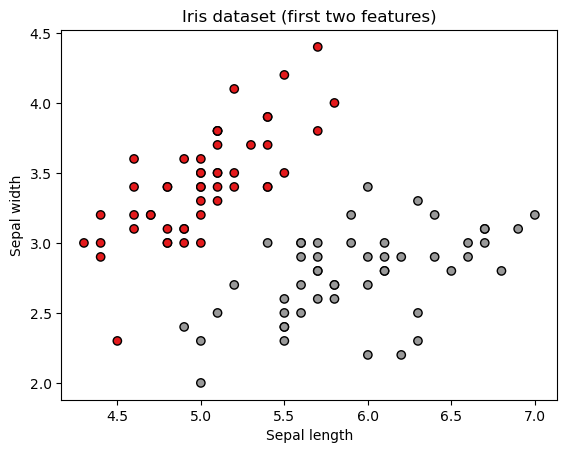

In [4]:
# Implementing an SVM with a Polynomial Kernel using Scikit-learn

## Step 1: Load the Dataset
#For demonstration purposes, we'll use the Iris dataset, but any dataset can be used similarly.


from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We take the first two features for visualization purposes
y = iris.target

# Binary classification: Only take the first two classes
X = X[y != 2]
y = y[y != 2]

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset (first two features)')
plt.show()


# Split the Dataset into Training and Testing Sets

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train the SVM

In [8]:
from sklearn.svm import SVC

# Train a SVM model with a polynomial kernel
clf = SVC(kernel='poly', degree=3, C=1.0)
clf.fit(X_train, y_train)


SVC(kernel='poly')

# Predict the evalute the model

In [9]:
from sklearn.metrics import accuracy_score

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM with polynomial kernel: {accuracy:.2f}')


Accuracy of SVM with polynomial kernel: 1.00


# Visualize the Decision boundaries

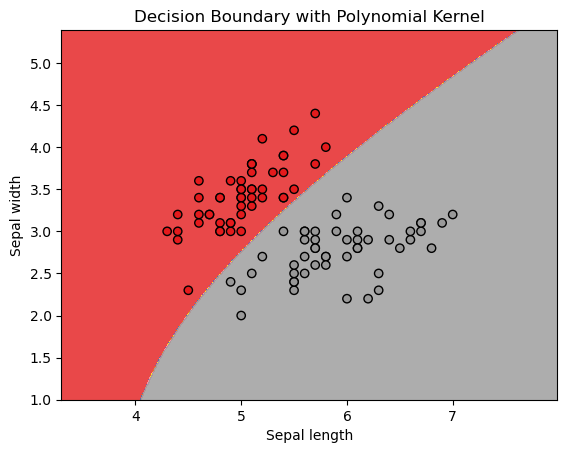

In [11]:
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Set1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision Boundary with Polynomial Kernel')
    plt.show()

plot_decision_boundary(clf, X, y)


# Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

# Ans-

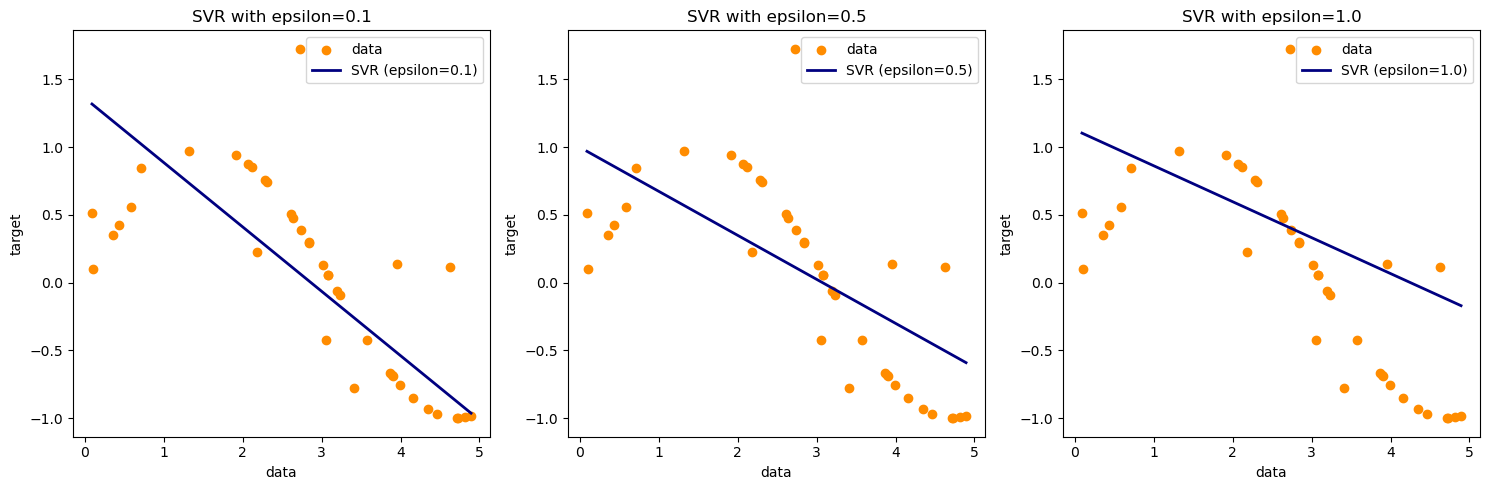

Number of support vectors with epsilon=0.1: 36
Number of support vectors with epsilon=0.5: 12
Number of support vectors with epsilon=1.0: 3


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

# Define and fit SVR models with different epsilon values
epsilons = [0.1, 0.5, 1.0]
svrs = [SVR(kernel='linear', C=1.0, epsilon=epsilon) for epsilon in epsilons]
svr_fits = [svr.fit(X, y) for svr in svrs]

# Plot the results
plt.figure(figsize=(15, 5))
for i, epsilon in enumerate(epsilons):
    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(X, svrs[i].predict(X), color='navy', lw=2, label=f'SVR (epsilon={epsilon})')
    plt.xlabel('data')
    plt.ylabel('target')
    plt.title(f'SVR with epsilon={epsilon}')
    plt.legend()
    plt.tight_layout()

plt.show()

# Print the number of support vectors for each model
for i, epsilon in enumerate(epsilons):
    num_support_vectors = len(svrs[i].support_)
    print(f'Number of support vectors with epsilon={epsilon}: {num_support_vectors}')


# Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?

# Ans-

# Effect of Parameters on Support Vector Regression (SVR)

Support Vector Regression (SVR) is a powerful regression technique, but its performance heavily depends on the choice of parameters. Let's explore how the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of SVR, along with examples of when you might want to increase or decrease their values.

## Kernel Function
The kernel function determines the type of transformation applied to the input features to map them into a higher-dimensional space. It affects the complexity of the decision function and the ability to capture non-linear relationships.

- **Linear Kernel**: Suitable for linear relationships between features.
- **Polynomial Kernel**: Suitable for data with polynomial relationships.
- **RBF Kernel (Gaussian)**: Suitable for non-linear relationships.

## C Parameter
The C parameter controls the trade-off between maximizing the margin and minimizing training error. 

- **Increase C**: Fit the training data more closely and reduce training errors.
- **Decrease C**: Prioritize a wider margin and prevent overfitting.

## Epsilon Parameter (epsilon)
The epsilon parameter defines the size of the epsilon-insensitive zone, where errors are not penalized.

- **Increase epsilon**: Allow larger errors in the training data for a wider margin.
- **Decrease epsilon**: Enforce a stricter fit to the training data and prioritize minimizing errors.

## Gamma Parameter (gamma)
The gamma parameter defines the influence of a single training example.

- **Increase gamma**: Give more weight to points close to the decision boundary, leading to a more complex decision boundary.
- **Decrease gamma**: Give less weight to points close to the decision boundary, leading to a smoother decision boundary.

## Example Scenarios
- **Linear Relationships**: Use a linear kernel and a smaller C to prioritize a wider margin and prevent overfitting.
- **Non-linear Relationships**: Use an RBF kernel with an appropriate gamma value to capture non-linear relationships.
- **Tolerance for Errors**: Increase epsilon to allow larger errors in the training data for a wider margin.
- **Data Complexity**: Adjust C and gamma based on the complexity of the data and desired model flexibility.

By tuning these parameters appropriately, you can achieve better performance and generalization with SVR for different types of datasets and problem scenarios.


# Q5. Assignment:
L Import the necessary libraries and load the dataseg
L Split the dataset into training and testing setZ
L Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK
L Create an instance of the SVC classifier and train it on the training datW
L hse the trained classifier to predict the labels of the testing datW
L Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
precision, recall, F1-scoreK
L Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
improve its performanc_
L Train the tuned classifier on the entire dataseg
L Save the trained classifier to a file for future use.

# Asn-

In [13]:
# Assignment: Support Vector Classifier (SVC) on a Dataset

## Import Libraries and Load Dataset


import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import joblib

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target


In [19]:
# split the dataset into training and testing dataset
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Preprocess the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVC classifier and train it on the training data
svc = SVC()
svc.fit(X_train_scaled, y_train)

# Use the trained classifier to predict the labels of the testing data
y_pred = svc.predict(X_test_scaled)

# Evaluate the performance of the classifier using accuracy score and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)





Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
# Define the hyperparameters grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)


Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [21]:
# Train the tuned classifier on the entire dataset
best_svc = SVC(**best_params)
best_svc.fit(X_scaled, y)


NameError: name 'X_scaled_train' is not defined